In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11974,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.983500e+07,1.983500e+07,False,NaN,1,NaN,NaN,None,2025-03-10T19:33:00.000Z,78952.166623,5.552774e+10,127.9788,0.719907,-4.781424,-9.489896,-18.371628,-15.033017,-17.688776,1.566016e+12,61.0397,1.657995e+12,None,2025-03-10T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-10 15:34:51.475051
1,1027,Ethereum,ETH,ethereum,9964,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206048e+08,1.206048e+08,True,NaN,2,NaN,NaN,None,2025-03-10T19:32:00.000Z,1861.332767,3.214784e+10,131.4696,-2.689343,-8.628806,-14.828842,-29.564034,-42.762943,-48.482441,2.244856e+11,8.7499,2.244856e+11,None,2025-03-10T19:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-10 15:34:51.475051
2,825,Tether USDt,USDT,tether,118802,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.429307e+11,1.445563e+11,True,NaN,3,NaN,NaN,None,2025-03-10T19:32:00.000Z,0.999354,1.049507e+11,83.4934,-0.017761,-0.042484,0.009745,-0.071576,-0.038158,-0.093296,1.428384e+11,5.5675,1.444629e+11,None,2025-03-10T19:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-10 15:34:51.475051
3,52,XRP,XRP,xrp,1548,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.804330e+10,9.998637e+10,False,NaN,4,NaN,NaN,None,2025-03-10T19:32:00.000Z,2.060387,8.220744e+09,57.7389,0.307627,-3.799984,-15.502365,-15.165467,-10.278232,-0.565226,1.195916e+11,4.6564,2.060387e+11,None,2025-03-10T19:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-10 15:34:51.475051
4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424753e+08,1.424753e+08,False,NaN,5,NaN,NaN,None,2025-03-10T19:33:00.000Z,533.942524,1.870154e+09,26.0413,-0.995248,-4.467604,-8.145286,-14.698508,-22.268005,-20.317216,7.607364e+10,2.9652,7.607364e+10,None,2025-03-10T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-10 15:34:51.475051
5,5426,Solana,SOL,solana,848,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.090177e+08,5.958885e+08,True,NaN,6,NaN,NaN,None,2025-03-10T19:33:00.000Z,118.217797,5.491337e+09,86.3108,-0.105725,-8.090017,-19.528830,-40.375510,-37.125562,-44.125824,6.017495e+10,2.3455,7.044463e+10,None,2025-03-10T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-10 15:34:51.475051
6,3408,USDC,USDC,usd-coin,26112,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.795615e+10,5.795615e+10,False,NaN,7,NaN,NaN,None,2025-03-10T19:33:00.000Z,0.999988,1.655273e+10,224.7003,-0.006476,-0.038000,0.002114,-0.001634,0.006633,-0.004527,5.795544e+10,2.2590,5.795544e+10,None,2025-03-10T19:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-10 15:34:51.475051
7,2010,Cardano,ADA,cardano,1476,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.522421e+10,4.499491e+10,False,NaN,8,NaN,NaN,None,2025-03-10T19:33:00.000Z,0.683290,1.966276e+09,37.3008,0.842927,-6.023098,-22.436919,-2.715031,-24.981536,-28.600382,2.406834e+10,0.9381,3.074803e+10,None,2025-03-10T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-10 15:34:51.475051
8,74,Dogecoin,DOGE,dogecoin,1175,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, me

In [5]:
def api_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])

    if not os.path.isfile(r'C:\Users\tayle\OneDrive\Documents\Pandas\API.csv'):
        df.to_csv(r'C:\Users\tayle\OneDrive\Documents\Pandas\API.csv', header = 'column_names')
    else: 
        df.to_csv(r'C:\Users\tayle\OneDrive\Documents\Pandas\API.csv', mode ='a', header = False)
        

In [6]:
import os 
from time import time 
from time import sleep 

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 min
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [8]:
df3 = pd.read_csv(r'C:\Users\tayle\OneDrive\Documents\Pandas\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11971,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.983367e+07,1.983367e+07,False,NaN,1,NaN,NaN,NaN,2025-03-07T23:38:00.000Z,86427.816235,6.616229e+10,36.7502,0.197479,-4.505918,2.745285,-10.543179,-15.386056,-13.697687,1.714181e+12,60.3649,1.814984e+12,NaN,2025-03-07T23:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 18:39:49.211549
1,1,1027,Ethereum,ETH,ethereum,9963,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205974e+08,1.205974e+08,True,NaN,2,NaN,NaN,NaN,2025-03-07T23:38:00.000Z,2130.490215,2.280423e+10,19.2704,-0.449725,-3.677828,-4.490737,-23.401215,-42.114621,-46.888424,2.569316e+11,9.0459,2.569316e+11,NaN,2025-03-07T23:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 18:39:49.211549
2,2,825,Tether USDt,USDT,tether,118686,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.427998e+11,1.445563e+11,True,NaN,3,NaN,NaN,NaN,2025-03-07T23:38:00.000Z,0.999562,1.107770e+11,26.2882,-0.002313,-0.050567,0.031528,-0.030596,-0.084009,-0.131279,1.427372e+11,5.0254,1.444930e+11,NaN,2025-03-07T23:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-07 18:39:49.211549
3,3,52,XRP,XRP,xrp,1546,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.804330e+10,9.998637e+10,False,NaN,4,NaN,NaN,NaN,2025-03-07T23:38:00.000Z,2.366661,9.754249e+09,41.2679,-0.333444,-9.354221,10.443261,-0.422900,-2.027530,-8.600804,1.373688e+11,4.8364,2.366661e+11,NaN,2025-03-07T23:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 18:39:49.211549
4,4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.424755e+08,1.424755e+08,False,NaN,5,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,591.840261,1.864850e+09,14.5168,-0.266139,-1.032709,0.900556,4.100041,-19.028981,-21.455030,8.432276e+10,2.9711,8.432276e+10,NaN,2025-03-07T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 18:39:49.211549
5,5,5426,Solana,SOL,solana,848,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.087054e+08,5.955865e+08,True,NaN,6,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,138.409111,6.070806e+09,44.2061,-2.193092,-4.174610,-6.438262,-29.457706,-36.592436,-42.303691,7.040947e+10,2.4789,8.243459e+10,NaN,2025-03-07T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 18:39:49.211549
6,6,3408,USDC,USDC,usd-coin,26090,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.814024e+10,5.814024e+10,False,NaN,7,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,0.999831,1.275716e+10,32.9008,-0.029309,-0.023086,0.008019,-0.016022,-0.025005,-0.005844,5.813042e+10,2.0470,5.813042e+10,NaN,2025-03-07T23:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-07 18:39:49.211549
7,7,74,Dogecoin,DOGE,dogecoin,1174,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.483351e+11,1.483351e+11,True,NaN,8,NaN,NaN,NaN,2025-03-07T23:38:00.000Z,0.197116,1.827111e+09,1.2709,-1.191700,-2.947613,-2.223453,-22.826394,-49.020796,-56.820651,2.923924e+10,1.0297,2.923924e+10,NaN,2025-03-07T23:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-07 18:39:49.211549
8,8,2010,Cardano,ADA,cardano,1476,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'rese

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11974,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.983500e+07,1.983500e+07,False,NaN,1,NaN,NaN,None,2025-03-10T19:34:00.000Z,79199.664629,5.467461e+10,124.2726,1.051884,-4.475991,-9.122195,-18.117577,-14.765306,-17.377574,1.570925e+12,61.2311,1.663193e+12,None,2025-03-10T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-10 15:35:55.527581
1,1027,Ethereum,ETH,ethereum,9964,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206048e+08,1.206048e+08,True,NaN,2,NaN,NaN,None,2025-03-10T19:34:00.000Z,1867.902501,3.194529e+10,127.8970,-1.912988,-8.617386,-14.288817,-29.334461,-42.514121,-48.346019,2.252780e+11,8.7808,2.252780e+11,None,2025-03-10T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-10 15:35:55.527581
2,825,Tether USDt,USDT,tether,118802,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.429307e+11,1.445563e+11,True,NaN,3,NaN,NaN,None,2025-03-10T19:34:00.000Z,0.999171,1.046017e+11,82.4230,-0.052997,-0.056333,-0.041842,-0.084449,-0.066449,-0.108975,1.428122e+11,5.5665,1.444365e+11,None,2025-03-10T19:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-10 15:35:55.527581
3,52,XRP,XRP,xrp,1548,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.804330e+10,9.998637e+10,False,NaN,4,NaN,NaN,None,2025-03-10T19:34:00.000Z,2.066407,8.202073e+09,55.7054,0.836142,-4.756523,-15.769684,-15.031263,-10.152832,-0.034706,1.199411e+11,4.6700,2.066407e+11,None,2025-03-10T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-10 15:35:55.527581
4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424753e+08,1.424753e+08,False,NaN,5,NaN,NaN,None,2025-03-10T19:35:00.000Z,535.532571,1.872750e+09,25.9426,-0.593015,-4.337346,-7.758299,-14.396037,-22.015506,-20.076233,7.630019e+10,2.9740,7.630019e+10,None,2025-03-10T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-10 15:35:55.527581
5,5426,Solana,SOL,solana,848,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.090177e+08,5.958885e+08,True,NaN,6,NaN,NaN,None,2025-03-10T19:34:00.000Z,118.637660,5.499132e+09,86.1075,0.409965,-8.106330,-19.241962,-40.159186,-36.878140,-43.925991,6.038867e+10,2.3538,7.069482e+10,None,2025-03-10T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-10 15:35:55.527581
6,3408,USDC,USDC,usd-coin,26112,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.795615e+10,5.795615e+10,False,NaN,7,NaN,NaN,None,2025-03-10T19:34:00.000Z,0.999756,1.643255e+10,221.8780,-0.018465,-0.012883,-0.044321,-0.025675,-0.025991,-0.023818,5.794198e+10,2.2584,5.794198e+10,None,2025-03-10T19:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-10 15:35:55.527581
7,2010,Cardano,ADA,cardano,1476,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.522421e+10,4.499491e+10,False,NaN,8,NaN,NaN,None,2025-03-10T19:35:00.000Z,0.686400,1.971204e+09,37.1924,1.435797,-5.959629,-22.119535,-2.253593,-24.610654,-28.257283,2.417791e+10,0.9424,3.088802e+10,None,2025-03-10T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-10 15:35:55.527581
8,74,Dogecoin,DOGE,dogecoin,1175,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, 

In [12]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11974,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19835000.00000,19835000.00000,False,NaN,1,NaN,NaN,None,2025-03-10T19:34:00.000Z,79199.66463,54674610764.30286,124.27260,1.05188,-4.47599,-9.12219,-18.11758,-14.76531,-17.37757,1570925347916.76611,61.23110,1663192957209.58008,None,2025-03-10T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-10 15:35:55.527581
1,1027,Ethereum,ETH,ethereum,9964,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120604782.59896,120604782.59896,True,NaN,2,NaN,NaN,None,2025-03-10T19:34:00.000Z,1867.90250,31945286013.11833,127.89700,-1.91299,-8.61739,-14.28882,-29.33446,-42.51412,-48.34602,225277975072.31461,8.78080,225277975072.31000,None,2025-03-10T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-10 15:35:55.527581
2,825,Tether USDt,USDT,tether,118802,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,142930697844.90527,144556334058.74066,True,NaN,3,NaN,NaN,None,2025-03-10T19:34:00.000Z,0.99917,104601667531.65869,82.42300,-0.05300,-0.05633,-0.04184,-0.08445,-0.06645,-0.10898,142812248148.29214,5.56650,144436537162.97000,None,2025-03-10T19:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-10 15:35:55.527581
3,52,XRP,XRP,xrp,1548,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58043299826.00000,99986368206.00000,False,NaN,4,NaN,NaN,None,2025-03-10T19:34:00.000Z,2.06641,8202073389.77340,55.70540,0.83614,-4.75652,-15.76968,-15.03126,-10.15283,-0.03471,119941104111.57329,4.67000,206640739708.34000,None,2025-03-10T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-10 15:35:55.527581
4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142475344.20000,142475344.20000,False,NaN,5,NaN,NaN,None,2025-03-10T19:35:00.000Z,535.53257,1872749660.46632,25.94260,-0.59301,-4.33735,-7.75830,-14.39604,-22.01551,-20.07623,76300187339.42609,2.97400,76300187339.42999,None,2025-03-10T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-10 15:35:55.527581
5,5426,Solana,SOL,solana,848,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,509017696.42393,595888522.39072,True,NaN,6,NaN,NaN,None,2025-03-10T19:34:00.000Z,118.63766,5499132087.13754,86.10750,0.40996,-8.10633,-19.24196,-40.15919,-36.87814,-43.92599,60388668393.13487,2.35380,70694819906.53000,None,2025-03-10T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-10 15:35:55.527581
6,3408,USDC,USDC,usd-coin,26112,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,57956150521.00586,57956150521.00586,False,NaN,7,NaN,NaN,None,2025-03-10T19:34:00.000Z,0.99976,16432550296.07532,221.87800,-0.01847,-0.01288,-0.04432,-0.02568,-0.02599,-0.02382,57941981802.20875,2.25840,57941981802.21000,None,2025-03-10T19:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-10 15:35:55.527581
7,2010,Cardano,ADA,cardano,1476,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35224212741.26694,44994911756.12524,False,NaN,8,NaN,NaN,None,2025-03-10T19:35:00.000Z,0.68640,1971204424.22783,37.19240,1.43580,-5.95963,-22.11954,-2.25359,-24.61065,-28.25728,24177913283.32930,0.94240,308880

In [16]:
df4 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.05188,-4.47599,-9.12219,-18.11758,-14.76531,-17.37757
Ethereum,-1.91299,-8.61739,-14.28882,-29.33446,-42.51412,-48.34602
Tether USDt,-0.05300,-0.05633,-0.04184,-0.08445,-0.06645,-0.10898
XRP,0.83614,-4.75652,-15.76968,-15.03126,-10.15283,-0.03471
BNB,-0.59301,-4.33735,-7.75830,-14.39604,-22.01551,-20.07623
Solana,0.40996,-8.10633,-19.24196,-40.15919,-36.87814,-43.92599
USDC,-0.01847,-0.01288,-0.04432,-0.02568,-0.02599,-0.02382
Cardano,1.43580,-5.95963,-22.11954,-2.25359,-24.61065,-28.25728
Dogecoin,-0.83680,-8.57666,-23.33411,-38.24136,-51.33323,-59.21386


In [18]:
df5 = df4.stack()
df5

name                                      
Bitcoin       quote.USD.percent_change_1h      1.05188
              quote.USD.percent_change_24h    -4.47599
              quote.USD.percent_change_7d     -9.12219
              quote.USD.percent_change_30d   -18.11758
              quote.USD.percent_change_60d   -14.76531
              quote.USD.percent_change_90d   -17.37757
Ethereum      quote.USD.percent_change_1h     -1.91299
              quote.USD.percent_change_24h    -8.61739
              quote.USD.percent_change_7d    -14.28882
              quote.USD.percent_change_30d   -29.33446
              quote.USD.percent_change_60d   -42.51412
              quote.USD.percent_change_90d   -48.34602
Tether USDt   quote.USD.percent_change_1h     -0.05300
              quote.USD.percent_change_24h    -0.05633
              quote.USD.percent_change_7d     -0.04184
              quote.USD.percent_change_30d    -0.08445
              quote.USD.percent_change_60d    -0.06645
              quote.US

In [22]:
type(df4)

pandas.core.frame.DataFrame

In [24]:
type(df5)

pandas.core.series.Series

In [26]:
df6 = df5.to_frame(name='values')
df6

values
name                                               
Bitcoin      quote.USD.percent_change_1h    1.05188
             quote.USD.percent_change_24h  -4.47599
             quote.USD.percent_change_7d   -9.12219
             quote.USD.percent_change_30d -18.11758
             quote.USD.percent_change_60d -14.76531
             quote.USD.percent_change_90d -17.37757
Ethereum     quote.USD.percent_change_1h   -1.91299
             quote.USD.percent_change_24h  -8.61739
             quote.USD.percent_change_7d  -14.28882
             quote.USD.percent_change_30d -29.33446
             quote.USD.percent_change_60d -42.51412
             quote.USD.percent_change_90d -48.34602
Tether USDt  quote.USD.percent_change_1h   -0.05300
             quote.USD.percent_change_24h  -0.05633
             quote.USD.percent_change_7d   -0.04184
             quote.USD.percent_change_30d  -0.08445
             quote.USD.percent_change_60d  -0.06645
             quote.USD.percent_change_90d  -0.10898
XRP          quote.USD.percent_change_1h    0.83614
             quote.USD.percent_change_24h  -4.75652
             quote.USD.percent_change_7d  -15.76968
             quote.USD.percent_change_30d -15.03126
             quote.USD.percent_change_60d -10.15283
             quote.USD.percent_change_90d  -0.03471
BNB          quote.USD.percent_change_1h   -0.59301
             quote.USD.percent_change_24h  -4.33735
             quote.USD.percent_change_7d   -7.75830
             quote.USD.percent_change_30d -14.39604
             quote.USD.percent_change_60d -22.01551
             quote.USD.percent_change_90d -20.07623
Solana       quote.USD.percent_change_1h    0.40996
             quote.USD.percent_change_24h  -8.10633
             quote.USD.percent_change_7d  -19.24196
             quote.USD.percent_change_30d -40.15919
             quote.USD.percent_change_60d -36.87814
             quote.USD.percent_change_90d -43.92599
USDC         quote.USD.percent_change_1h   -0.01847
             quote.USD.percent_change_24h  -0.01288
             quote.USD.percent_change_7d   -0.04432
             quote.USD.percent_change_30d  -0.02568
             quote.USD.percent_change_60d  -0.02599
             quote.USD.percent_change_90d  -0.02382
Cardano      quote.USD.percent_change_1h    1.43580
             quote.USD.percent_change_24h  -5.95963
             quote.USD.percent_change_7d  -22.11954
             quote.USD.percent_change_30d  -2.25359
             quote.USD.percent_change_60d -24.61065
             quote.USD.percent_change_90d -28.25728
Dogecoin     quote.USD.percent_change_1h   -0.83680
             quote.USD.percent_change_24h  -8.57666
             quote.USD.percent_change_7d  -23.33411
             quote.USD.percent_change_30d -38.24136
             quote.USD.percent_change_60d -51.33323
             quote.USD.percent_change_90d -59.21386
TRON         quote.USD.percent_change_1h   -0.85100
             quote.USD.percent_change_24h  -3.07497
             quote.USD.percent_change_7d   -0.68324
             quote.USD.percent_change_30d  -1.00401
             quote.USD.percent_change_60d  -5.05421
             quote.USD.percent_change_90d -11.62398
Pi           quote.USD.percent_change_1h    1.40045
             quote.USD.percent_change_24h   5.21975
             quote.USD.percent_change_7d  -19.97079
             quote.USD.percent_change_30d -20.03429
             quote.USD.percent_change_60d -20.03429
             quote.USD.percent_change_90d -20.03429
UNUS SED LEO quote.USD.percent_change_1h   -0.58623
             quote.USD.percent_change_24h  -0.23598
             quote.USD.percent_change_7d   -2.41966
             quote.USD.percent_change_30d  -1.13416
             quote.USD.percent_change_60d   7.34813
             quote.USD.percent_change_90d   1.92417
Chainlink    quote.USD.percent_change_1h   -0.57751
             quote.USD.percent_change_24h  -7.87092
             quote.USD.percent_change_7d  -15.45530
             quote.USD.percent_change_30d

In [30]:
type(df6)

pandas.core.frame.DataFrame

In [34]:
df6.count()

values    90
dtype: int64

In [38]:
index = pd.Index(range(90))

df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,1.05188
1,Bitcoin,quote.USD.percent_change_24h,-4.47599
2,Bitcoin,quote.USD.percent_change_7d,-9.12219
3,Bitcoin,quote.USD.percent_change_30d,-18.11758
4,Bitcoin,quote.USD.percent_change_60d,-14.76531
5,Bitcoin,quote.USD.percent_change_90d,-17.37757
6,Ethereum,quote.USD.percent_change_1h,-1.91299
7,Ethereum,quote.USD.percent_change_24h,-8.61739
8,Ethereum,quote.USD.percent_change_7d,-14.28882
9,Ethereum,quote.USD.percent_change_30d,-29.33446


In [44]:
df8 = df7.rename(columns={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.05188
1,Bitcoin,quote.USD.percent_change_24h,-4.47599
2,Bitcoin,quote.USD.percent_change_7d,-9.12219
3,Bitcoin,quote.USD.percent_change_30d,-18.11758
4,Bitcoin,quote.USD.percent_change_60d,-14.76531
5,Bitcoin,quote.USD.percent_change_90d,-17.37757
6,Ethereum,quote.USD.percent_change_1h,-1.91299
7,Ethereum,quote.USD.percent_change_24h,-8.61739
8,Ethereum,quote.USD.percent_change_7d,-14.28882
9,Ethereum,quote.USD.percent_change_30d,-29.33446


In [60]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,1.05188
1,Bitcoin,24h,-4.47599
2,Bitcoin,7d,-9.12219
3,Bitcoin,30d,-18.11758
4,Bitcoin,60d,-14.76531
5,Bitcoin,90d,-17.37757
6,Ethereum,1h,-1.91299
7,Ethereum,24h,-8.61739
8,Ethereum,7d,-14.28882
9,Ethereum,30d,-29.33446


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

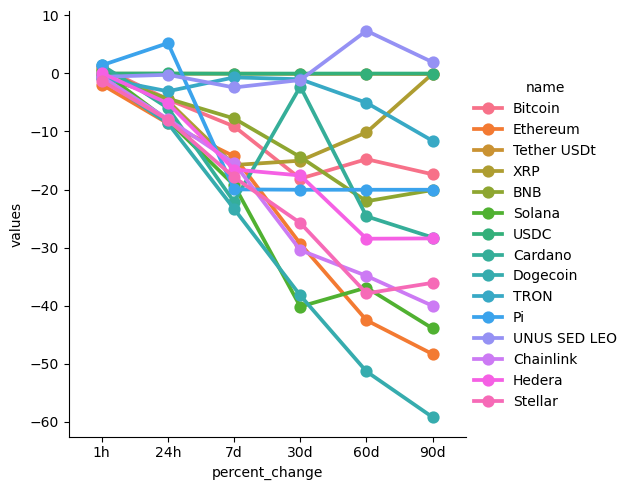

In [62]:
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')

In [66]:
df9 = df[['name','quote.USD.price','timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,79199.66463,2025-03-10 15:35:55.527581
0,Bitcoin,79199.66463,2025-03-10 15:35:55.527581


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

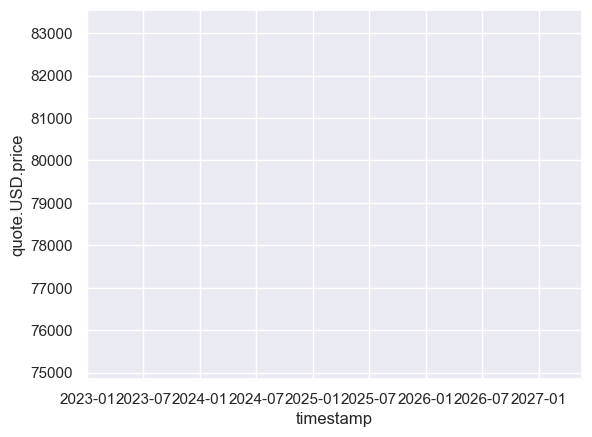

In [70]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df9)